In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data into two columns
orig_data = pd.read_csv('imdb_labelled.txt', sep=('\n' and '\t') , header=None)
orig_data.columns = ['comment', 'feedback']

In [3]:
data = orig_data.copy()

In [4]:
#DataFrame of all the negative comments
neg_data = data[data['feedback']==0]

In [5]:
neg_comments = list(neg_data['comment'])
neg_comment_list = [] #a list of 362 sublists. Each sublist is one neg comment split up by words.
for comment in neg_comments:
    words = comment.split()
    neg_comment_list.append(words)
neg_word_list = [] #a list of all 7533 words in all the neg comments. With many duplicates
for comment in neg_comment_list:
    for word in comment:
        neg_word_list.append(word)

In [6]:
neg_word_freq = {} #a dictionary of all 2484 words in neg comments and how many times they appear
for word in neg_word_list:
    if word not in neg_word_freq:
        neg_word_freq[word] = 1
    else:
        neg_word_freq[word] += 1

In [7]:
from collections import Counter
neg_top100_counts = list(Counter(neg_word_freq).most_common(100)) #neg_top100_counts is a list of tuples (word, count)

In [8]:
pos_data = data[data['feedback']==1]

In [9]:
#let's do the same for positive words
pos_comments = list(pos_data['comment'])
pos_comment_list = []
for comment in pos_comments:
    words = comment.split()
    pos_comment_list.append(words)
pos_word_list = []
for comment in pos_comment_list:
    for word in comment:
        pos_word_list.append(word)

In [10]:
pos_word_freq = {}
for word in pos_word_list:
    if word not in pos_word_freq:
        pos_word_freq[word] = 1
    else:
        pos_word_freq[word] += 1

In [11]:
pos_top100_counts = list(Counter(pos_word_freq).most_common(100))

In [12]:
#making a list each for most common words
pos100 = [x for (x,y) in pos_top100_counts]
neg100 = [x for (x,y) in neg_top100_counts]

neg_unique = [x for x in pos100 if x not in neg100]
pos_unique = [x for x in neg100 if x not in pos100]
print('These words are top 100 positive but not top 100 negative: {}'.format(pos_unique))
print('These words are top 100 negative but not top 100 positive: {}'.format(neg_unique))

These words are top 100 positive but not top 100 negative: ['bad', 'even', 'how', 'no', 'only', 'would', "didn't", 'plot', 'than', 'your', 'they', 'make', 'There', 'any', 'could', 'bad.', 'little', 'other', 'waste', 'If', 'much', 'real', 'work', 'totally']
These words are top 100 negative but not top 100 positive: ['will', 'wonderful', 'when', 'its', 'think', 'best', 'A', 'had', 'movies', 'well', 'do', 'her', 'what', 'their', 'over', 'character', 'look', 'worth', 'actors', 'liked', 'love', 'into', 'many', 'people']


In [13]:
#creating a list of words I'd expect to see exclusively in negative comments
#then creating columns that states whether in comments
neg_keywords = ['bad', 'even', 'how', 'no', 'only', 'would', "didn't", 'plot', 'than', 'your', 'they', 'make', 'There', 'any', 'could', 'little', 'other', 'waste', 'If', 'much', 'real', 'work', 'totally']

for key in neg_keywords:
    data[key] = data.comment.str.contains(
        str(key),
        case=False
    )

In [14]:
data['feedback_bool_neg'] = data.feedback == 0

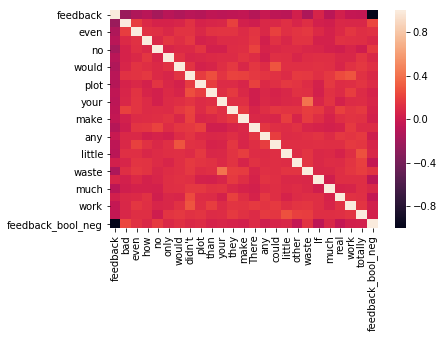

In [15]:
sns.heatmap(data.corr())

In [16]:
from sklearn.naive_bayes import BernoulliNB

In [17]:
bnb = BernoulliNB()

In [18]:
test_data = data[neg_keywords]
target = data.feedback_bool_neg

In [19]:
bnb.fit(test_data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [20]:
y_pred = bnb.predict(test_data)

In [21]:
print('# of mislabeled comments out of total {} comments : {}'.format(test_data.shape[0], (target != y_pred).sum()))

# of mislabeled comments out of total 748 comments : 239
